Written by Daksh Agrawal

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the data
data = pd.read_csv('../data/raw/historical_data.csv')
data

,type,suburb,Count,Date,Median
0,1 bedroom flat,Albert Park-Middle Park-West St Kilda,352.0,Mar 2000,165.0
1,1 bedroom flat,Armadale,210.0,Mar 2000,150.0
2,1 bedroom flat,Carlton North,87.0,Mar 2000,150.0
3,1 bedroom flat,Carlton-Parkville,303.0,Mar 2000,165.0
4,1 bedroom flat,CBD-St Kilda Rd,755.0,Mar 2000,250.0
...,...,...,...,...,...
202855,All properties,Group Total,11944.0,Mar 2023,485.0
202856,All properties,Group Total,11944.0,Mar 2023,425.0
202857,All properties,Group Total,11944.0,Mar 2023,380.0
202858,All properties,Group Total,11944.0,Mar 2023,400.0


In [15]:
# Check for missing values
data.isnull().sum()

type         0
suburb       0
Count     3472
Date         0
Median    3472
dtype: int64

In [16]:
# Drop the missing values
data.dropna(inplace=True)

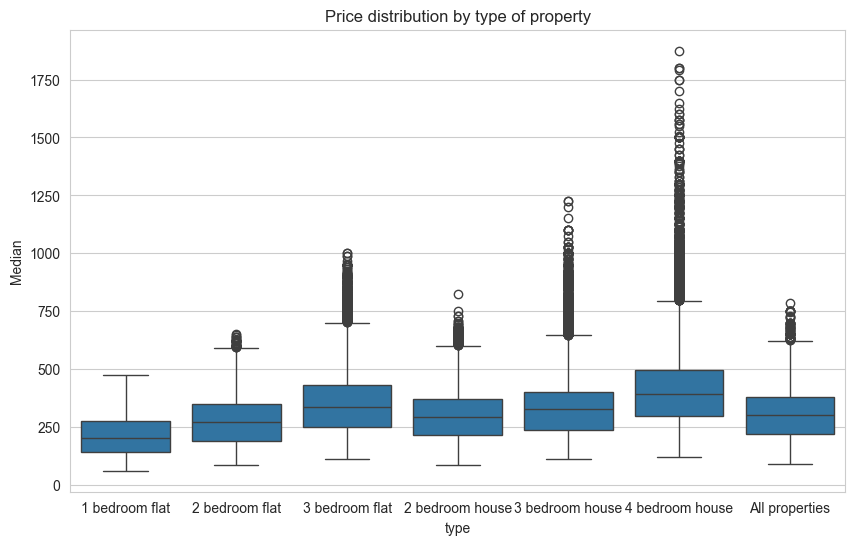

In [17]:
# Plot the price for each type of property
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Median', data=data)
plt.title('Price distribution by type of property')
plt.show()

In [18]:
# Convert the Date column to datetime
# data['Date'] = pd.to_datetime(data['Date'])

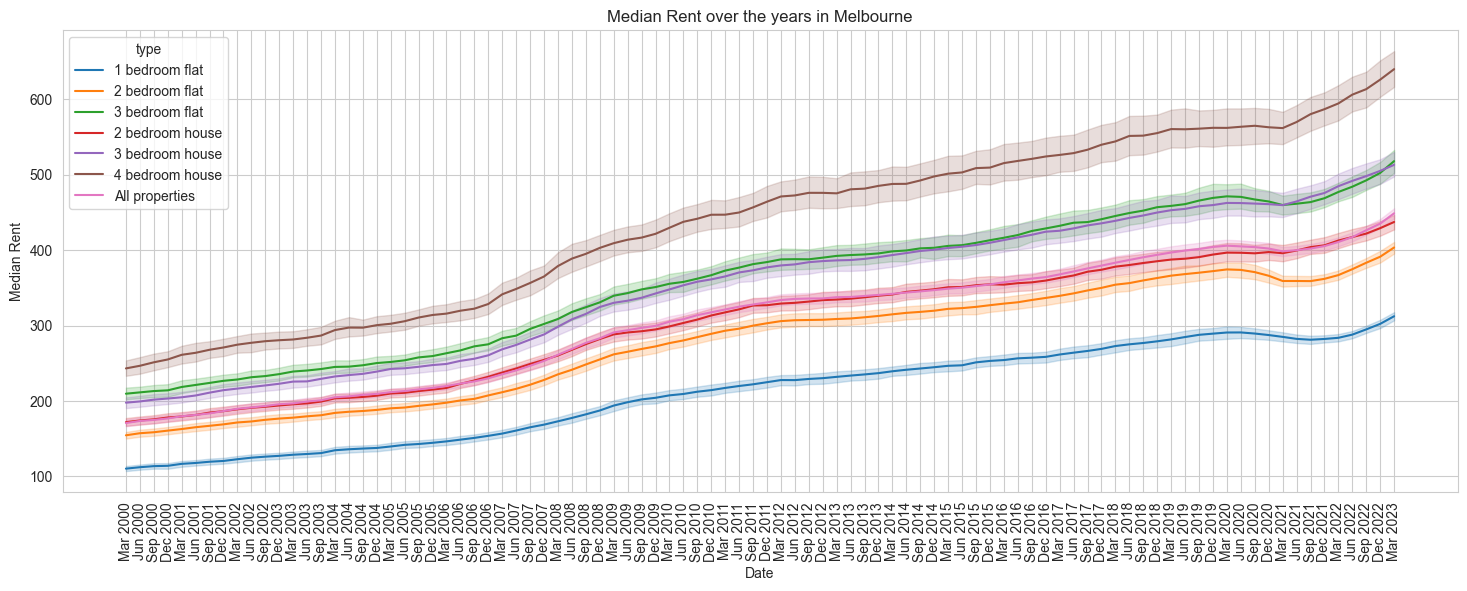

In [19]:
# Plot the price by Date
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=data, hue='type')
plt.title('Median Rent over the years in Melbourne')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Calculate the rent slope for each suburb over the years
slopes = []
for suburb in data['suburb'].unique():
    df = data[data['suburb'] == suburb]
    x = np.arange(len(df))
    y = df['Median']
    slope = np.polyfit(x, y, 1)[0]
    slopes.append((suburb, slope))
slopes = pd.DataFrame(slopes, columns=['suburb', 'slope'])
slopes = slopes.sort_values(by='slope', ascending=False)
slopes

,suburb,slope
20,Toorak,0.996953
40,Brighton,0.866453
133,Brighton East,0.771530
138,Docklands,0.743663
1,Armadale,0.720109
...,...,...
143,Craigieburn,0.164105
140,Mill Park-Epping,0.159439
98,Corio,0.152593
142,Melton,0.072840


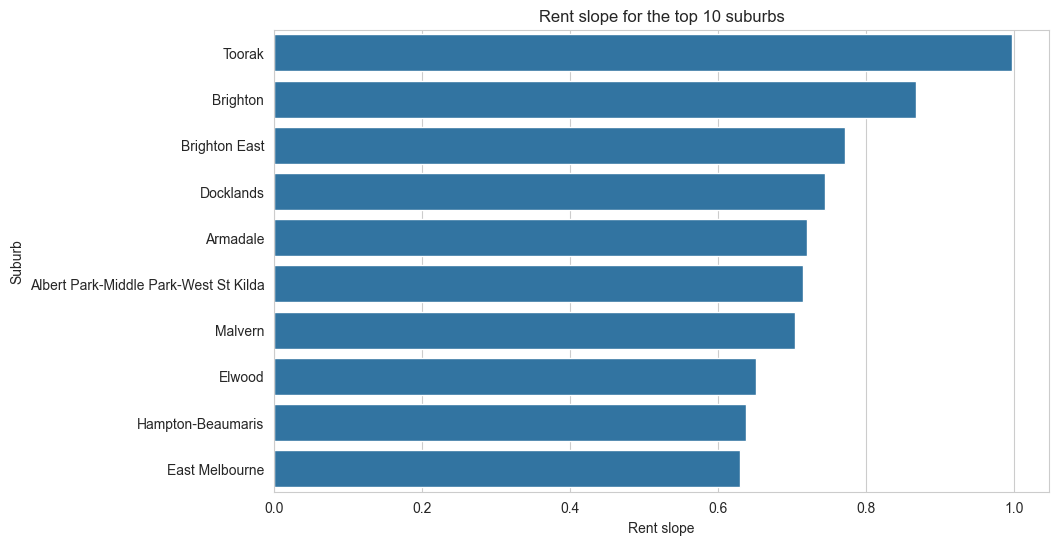

In [24]:
# Plot the rent slope for some suburbs
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='suburb', data=slopes.head(10))
plt.title('Rent slope for the top 10 suburbs')
plt.xlabel('Rent slope')
plt.ylabel('Suburb')
plt.show()

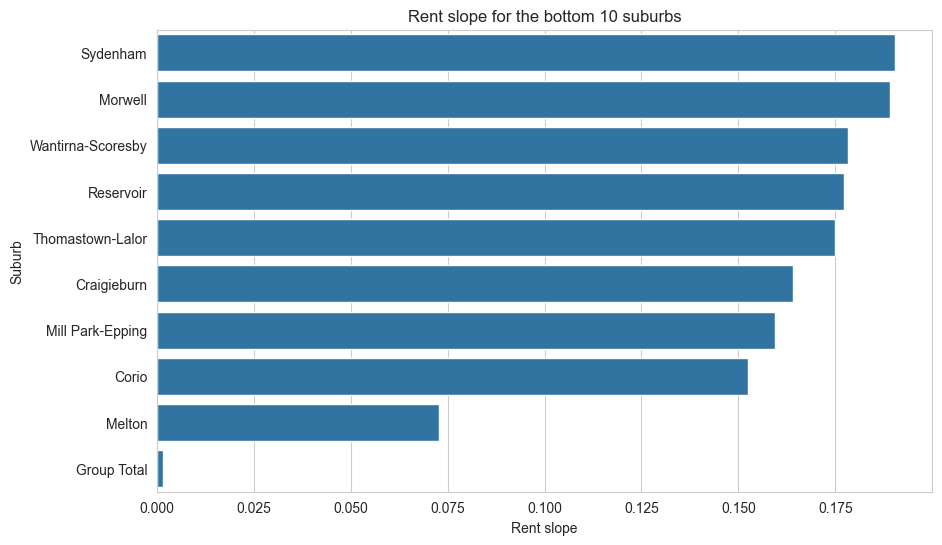

In [25]:
# Plot the rent slope for bottom 10 suburbs
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='suburb', data=slopes.tail(10))
plt.title('Rent slope for the bottom 10 suburbs')
plt.xlabel('Rent slope')
plt.ylabel('Suburb')
plt.show()

/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_5650/444705582.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Median', data=top_10_data, hue='suburb', ci=None)
/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_5650/444705582.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Median', data=bottom_10_data, hue='suburb', ci=None)


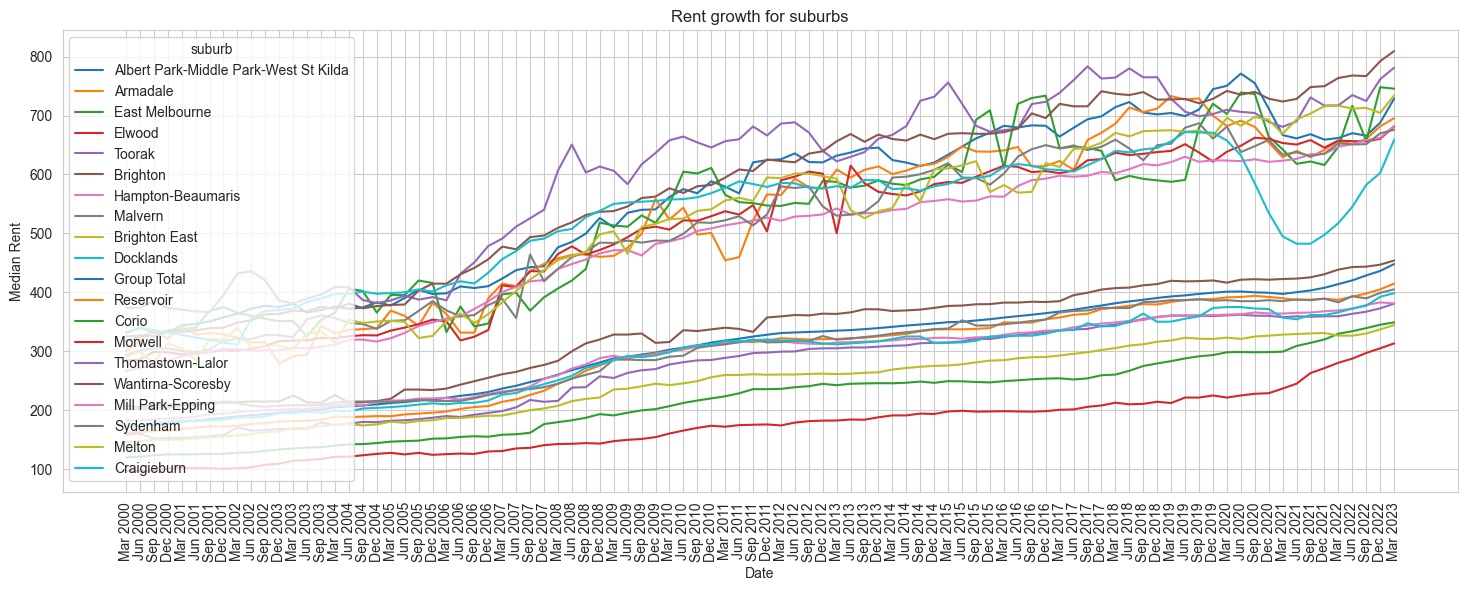

In [27]:
# Plot the rent growth for top and bottom 10 suburbs (lineplot of the median rent)
top_10 = slopes.head(10)
bottom_10 = slopes.tail(10)
top_10_data = data[data['suburb'].isin(top_10['suburb'])]
bottom_10_data = data[data['suburb'].isin(bottom_10['suburb'])]
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=top_10_data, hue='suburb', ci=None)
sns.lineplot(x='Date', y='Median', data=bottom_10_data, hue='suburb', ci=None)
plt.title('Rent growth for suburbs')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()